In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import sklearn

# Data source:
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [2]:
df = pd.read_csv('/Users/fahimeh/Projects/Data_science_prep/data/Seoul_Bike_dataset/SeoulBikeData.csv')
df.columns = ['Date','bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 
              'rain', 'snow', 'season', 'holiday', 'functioning_day']  

df = df[df['hour']==12]
df.drop(columns=['Date', 'holiday', 'season', 'hour'], inplace=True)
df['functioning_day'] = df['functioning_day'].map({'Yes': 1, 'No': 0})
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functioning_day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


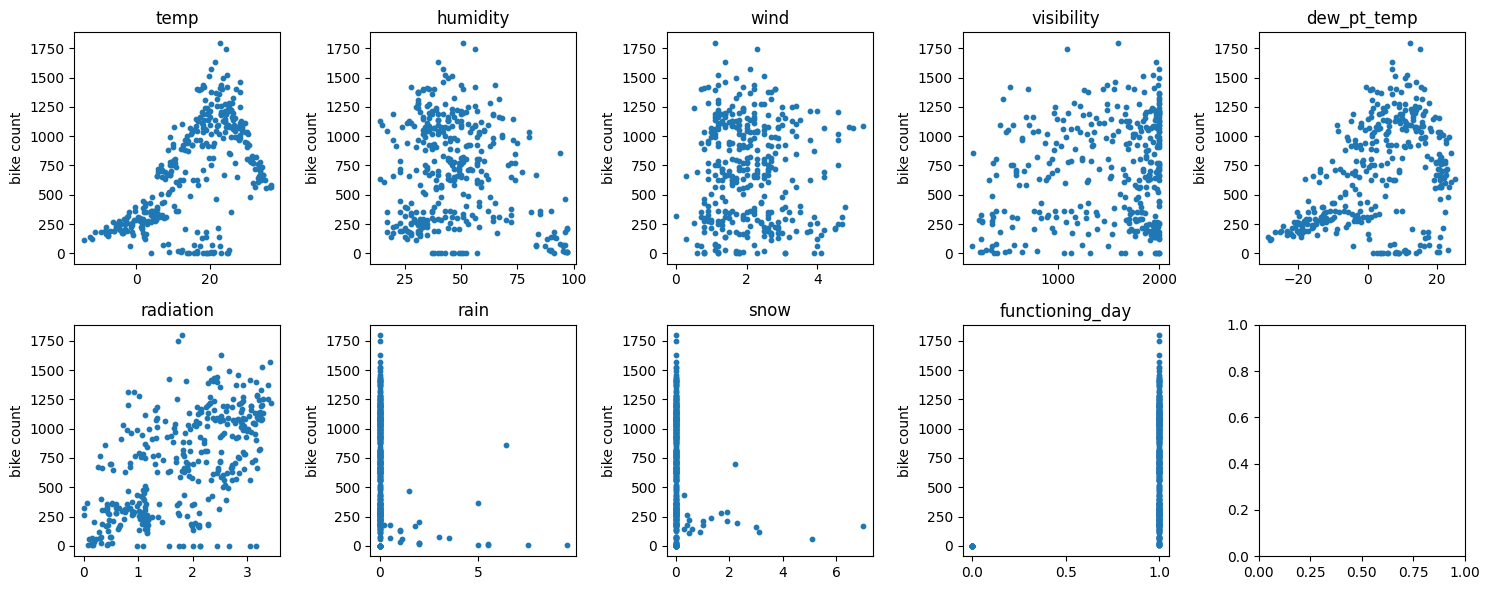

In [3]:
fig, axes = plt.subplots(2,5, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(df.columns[1:]):
    axes[i].scatter(df[col], df['bike_count'], s=10)
    axes[i].set_title(col)
    axes[i].set_ylabel('bike count')
plt.tight_layout()  
plt.show()


In [38]:
df.drop(columns=['wind', 'visibility', 'functioning_day'], inplace=True)

In [39]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [85]:
# scaler = sklearn.preprocessing.StandardScaler()
# scaled_X = scaler.fit_transform(df.drop(columns=['bike_count']))
# scaled_X = pd.DataFrame(scaled_X, columns=df.columns[1:])
# scaled_X['bike_count'] = df['bike_count'].values
# scaled_X.head()
# df = scaled_X.copy()

# Train / Valid / Test dataset

In [86]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

/Users/fahimeh/miniconda3/envs/mlcc/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# Linear Regression (Supervised Learning)

For linear regression we have few assumptions: 1- linearity (data is linear not curvy) , 2- independence (data points dont depend on each other), 3-normality (residulas which are the distance of points from the fitted line are distributed normally around the fitted line), 4-homoskedacticity (residulas are normally disributed around the fitted line and this normal distrobution is more or less the same along the fitted line. for example when we go up and down the line, there is not a region where the normal distribution is super narrow and some other area the distribution is super flat)

There are multiple metrics to evaluate the linear regression model. such as 1- Mean absolute error, 2- Mean squared error (MSE), 3- Root mean squared error (RMSE), 4- R squared (coefficient of determination)

R squared = 1 - RSS / TSS

RSS = sum ((yi - yi_predicted) ^2) # Sum of squared residuals
 
TSS = sum ((yi - mean(y)) ^2)      # Total sum of squares

If R2 is closer to 1, the line is a good fit

In [81]:
def get_xy(dataframe, y_label, x_labels=None):
    
    if not x_labels:
        X = dataframe[[col for col in dataframe.columns if col != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)

    return X, y


[711.2586162]
[[252.3271097]]


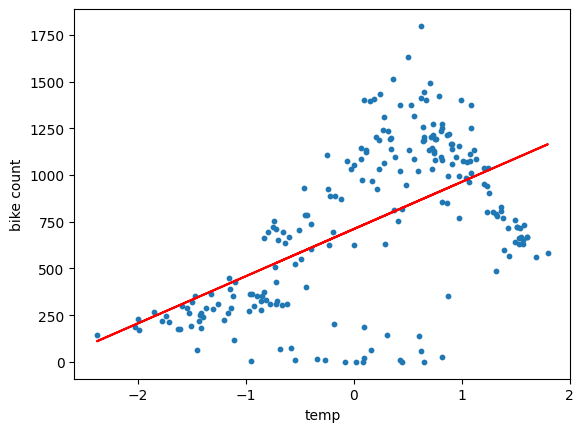

R^2 test: 0.3374053734229081
[744.63944088]
[[-111.16094]]


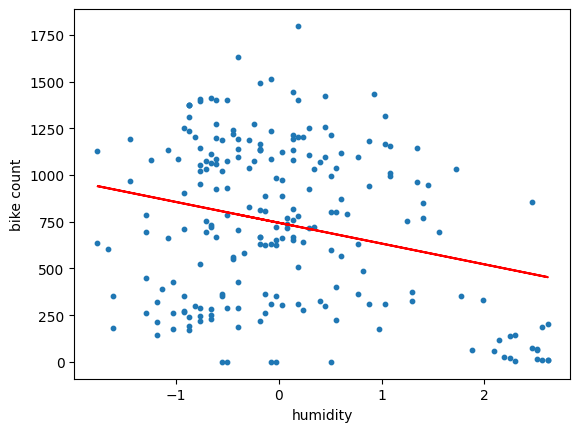

R^2 test: -0.19335794998302314
[719.99465152]
[[171.2639444]]


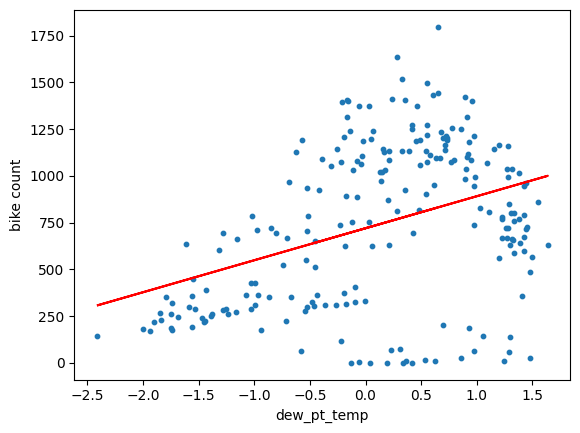

R^2 test: 0.24540970358505954
[729.6807409]
[[258.04844577]]


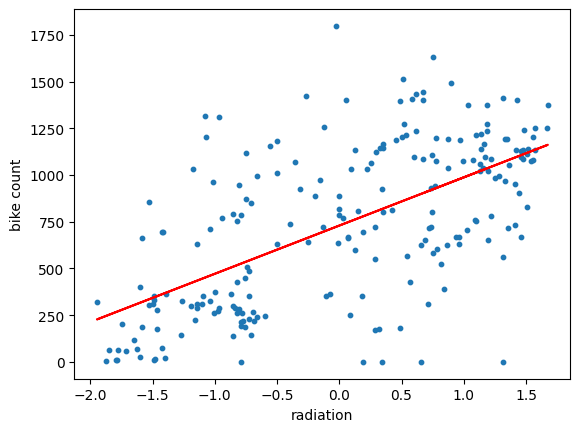

R^2 test: 0.24371681991869343
[741.86614018]
[[-110.03637783]]


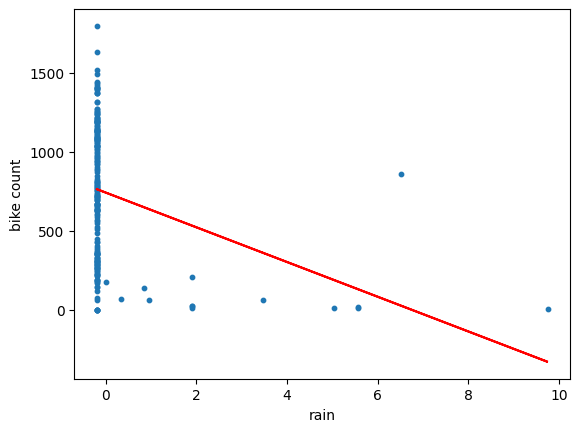

R^2 test: -0.07139572738297217
[733.73643251]
[[-112.45999616]]


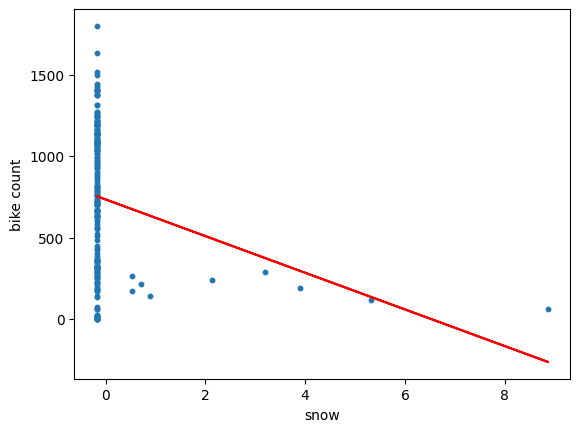

R^2 test: -0.08074067829365172


In [82]:
for xlabel in ['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow']:
    X_train, y_train = get_xy(train, 'bike_count', x_labels=[xlabel])
    X_valid, y_valid = get_xy(valid, 'bike_count', x_labels=[xlabel])
    X_test, y_test = get_xy(test, 'bike_count', x_labels=[xlabel])  

    regressor = sklearn.linear_model.LinearRegression()
    regressor.fit(X_train, y_train)

    print(regressor.intercept_)
    print(regressor.coef_)

    plt.scatter(X_train, y_train, s=10)
    plt.plot(X_train, regressor.intercept_ + regressor.coef_ * X_train, color='red')
    plt.xlabel(xlabel)
    plt.ylabel('bike count')
    plt.show()

    # Print the R^2 score
    print("R^2 test:", regressor.score(X_test, y_test))

# Multiple Linear Regression

In [83]:
X_train, y_train = get_xy(train, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
X_valid, y_valid = get_xy(valid, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
X_test, y_test = get_xy(test, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])  

In [84]:
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

# Print the R^2 score
print("R^2 test:", regressor.score(X_test, y_test))

[717.17612685]
[[ -90.77671672 -197.75308412  342.1544326   120.22230826  -25.77974492
   -13.36455247]]
R^2 test: 0.400421742661224


# Linear Regression with Neural net

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

def get_xy(dataframe, y_label, x_labels=None):
    
    if not x_labels:
        X = dataframe[[col for col in dataframe.columns if col != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)

    return X, y

# I am going to scale the data first
scaler = sklearn.preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

train, valid, test = np.split(scaled_df.sample(frac=1), [int(.6*len(scaled_df)), int(.8*len(scaled_df))])

X_train, y_train = get_xy(train, 'bike_count', x_labels=['temp'])
X_valid, y_valid = get_xy(valid, 'bike_count', x_labels=['temp'])
X_test, y_test = get_xy(test, 'bike_count', x_labels=['temp'])

# Now we have to convert the x and ys to torch tensors  
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_valid = torch.FloatTensor(X_valid)
y_valid = torch.FloatTensor(y_valid)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

/Users/fahimeh/miniconda3/envs/mlcc/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


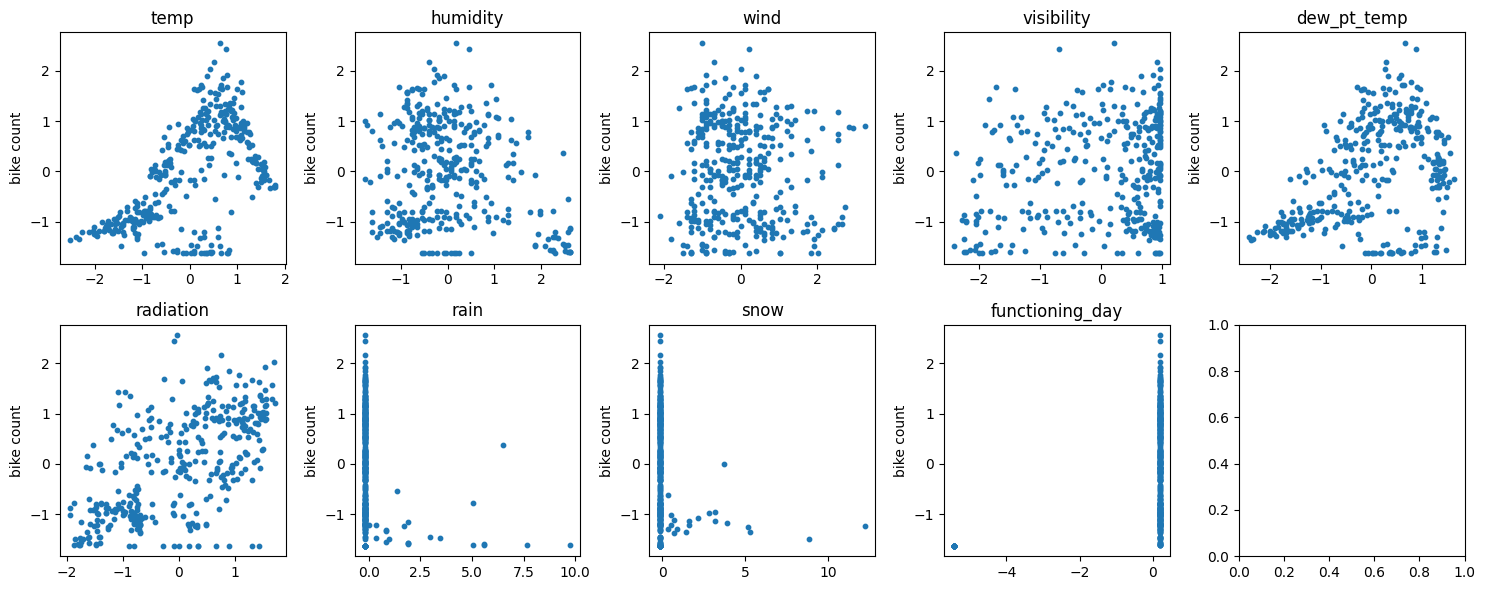

In [11]:
fig, axes = plt.subplots(2,5, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(scaled_df.columns[1:]):
    axes[i].scatter(scaled_df[col], scaled_df['bike_count'], s=10)
    axes[i].set_title(col)
    axes[i].set_ylabel('bike count')
plt.tight_layout()  
plt.show()


Epoch 10, Train Loss: 2.2386631965637207, Valid Loss: 2.6146903038024902
Epoch 20, Train Loss: 1.9227300882339478, Valid Loss: 2.2243473529815674
Epoch 30, Train Loss: 1.6523927450180054, Valid Loss: 1.8908716440200806
Epoch 40, Train Loss: 1.4270156621932983, Valid Loss: 1.6132254600524902
Epoch 50, Train Loss: 1.243391752243042, Valid Loss: 1.3873276710510254
Epoch 60, Train Loss: 1.0968103408813477, Valid Loss: 1.2073450088500977
Epoch 70, Train Loss: 0.9819542169570923, Valid Loss: 1.0667458772659302
Epoch 80, Train Loss: 0.8935036063194275, Valid Loss: 0.9590007066726685
Epoch 90, Train Loss: 0.8264975547790527, Valid Loss: 0.8779988884925842
Epoch 100, Train Loss: 0.7765289545059204, Valid Loss: 0.8182793259620667
Epoch 110, Train Loss: 0.7398278713226318, Valid Loss: 0.7751350998878479
Epoch 120, Train Loss: 0.713270366191864, Valid Loss: 0.7446329593658447
Epoch 130, Train Loss: 0.6943362355232239, Valid Loss: 0.7235754132270813
Epoch 140, Train Loss: 0.6810397505760193, Valid 

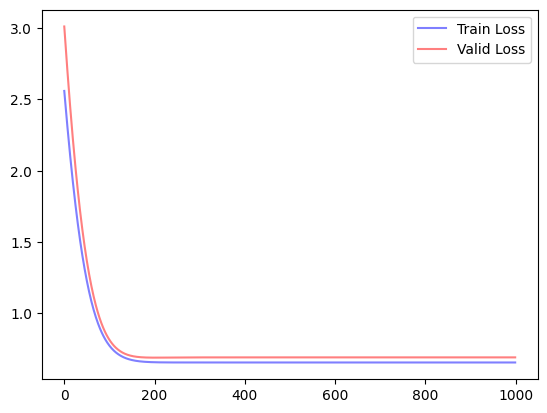

In [12]:
class BikeModel(nn.Module):
    def __init__(self, input_dim):
        super(BikeModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        return x


model = BikeModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 1000
train_losses = []
valid_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = criterion(y_pred, y_train)
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_valid)
        valid_loss = criterion(y_val_pred, y_valid)
    
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {train_loss.item()}, Valid Loss: {valid_loss.item()}')

plt.plot(train_losses, label='Train Loss', alpha=0.5, color='blue')   
plt.plot(valid_losses, label='Valid Loss', alpha=0.5, color='red')
plt.legend()
plt.show()


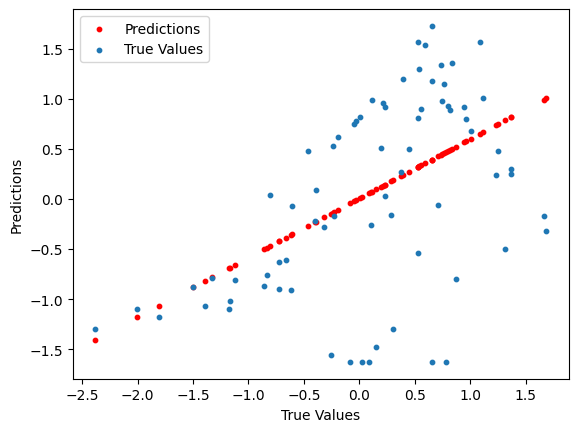

In [13]:
y_pred = model(X_test).detach().numpy()
plt.scatter(X_test, y_pred, color='red', s=10, label='Predictions')
plt.scatter(X_test, y_test, s=10, label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

IMPORTANT NOTE: if we are doing linear regression, using nn or computing the linear fit using sklearn should give us identical R2

In [14]:
# Put model in evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    y_pred = model(X_test)

# If your y_pred and y_test_tensor are column vectors, flatten them
y_pred = y_pred.view(-1)
y_true = y_test.view(-1)

# Compute R^2
ss_res = torch.sum((y_true - y_pred) ** 2)
ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"R² score: {r2.item():.4f}")

R² score: 0.2506


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.25063687562942505


# Multiple Linear Regression with nn


Epoch 1000, Train Loss: 0.4960341453552246, Valid Loss: 0.5443130135536194


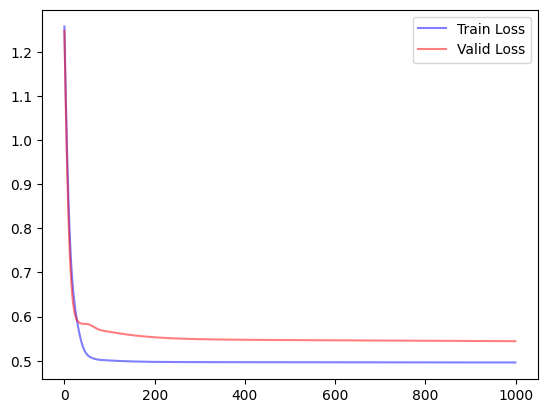

In [16]:
X_train, y_train = get_xy(train, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
X_valid, y_valid = get_xy(valid, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
X_test, y_test = get_xy(test, 'bike_count', x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])

# Now we have to convert the x and ys to torch tensors  
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_valid = torch.FloatTensor(X_valid)
y_valid = torch.FloatTensor(y_valid)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)


class BikeModel(nn.Module):
    def __init__(self, input_dim):
        super(BikeModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        return x


model = BikeModel(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 1000
train_losses = []
valid_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = criterion(y_pred, y_train)
    train_loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_valid)
        valid_loss = criterion(y_val_pred, y_valid)
    
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {train_loss.item()}, Valid Loss: {valid_loss.item()}')

plt.plot(train_losses, label='Train Loss', alpha=0.5, color='blue')   
plt.plot(valid_losses, label='Valid Loss', alpha=0.5, color='red')
plt.legend()
plt.show()

In [17]:
# Put model in evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    y_pred = model(X_test)

# If your y_pred and y_test_tensor are column vectors, flatten them
y_pred = y_pred.view(-1)
y_true = y_test.view(-1)

# Compute R^2
ss_res = torch.sum((y_true - y_pred) ** 2)
ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"R² score: {r2.item():.4f}")

R² score: 0.3896


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.39053434133529663


# Lets use a real nn instead of just linear regression nn

In [127]:
class BikeModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=32):
        super(BikeModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.fc3 = nn.Linear(hidden_dim, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        # x = self.relu(self.fc2(x))
        x = self.fc2(x)
        return x

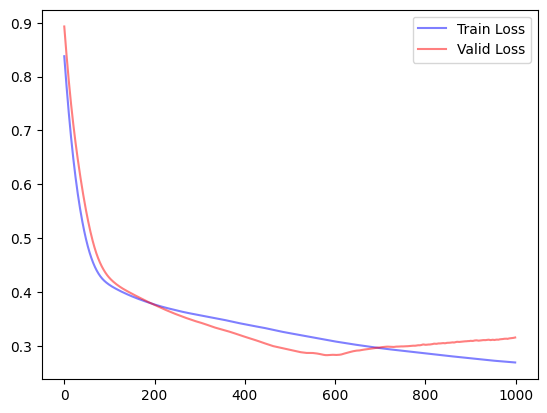

In [128]:
model = BikeModel(input_dim=X_train.shape[1], hidden_dim=32)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 1000
train_losses = []
valid_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    train_loss = criterion(y_pred, y_train)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_valid)
        valid_loss = criterion(y_val_pred, y_valid)
    train_losses.append(train_loss.item())
    valid_losses.append(valid_loss.item())
    
    if (epoch+1) % 10000 == 0:
        print(f'Epoch {epoch+1}, Train Loss: {train_loss.item()}, Valid Loss: {valid_loss.item()}')


plt.plot(train_losses, label='Train Loss', alpha=0.5, color='blue')   
plt.plot(valid_losses, label='Valid Loss', alpha=0.5, color='red')
plt.legend()
plt.show()

In [129]:
# Put model in evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    y_pred = model(X_test)

# # If your y_pred and y_test_tensor are column vectors, flatten them
y_pred = y_pred.view(-1)
y_true = y_test.view(-1)

# Compute R^2
ss_res = torch.sum((y_true - y_pred) ** 2)
ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"R² score: {r2.item():.4f}")

R² score: 0.4392


In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.39053434133529663


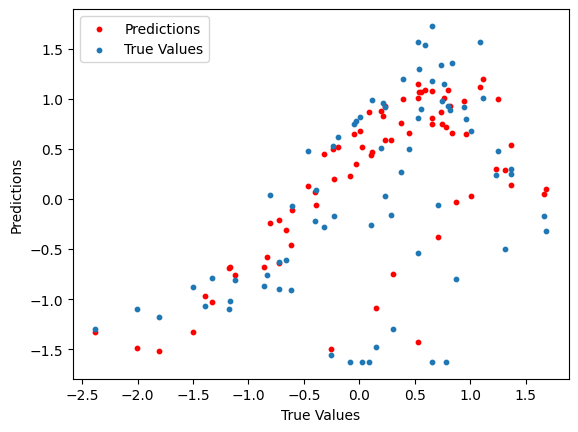

In [131]:
y_pred = model(X_test).detach().numpy()
plt.scatter(X_test[:,0], y_pred, color='red', s=10, label='Predictions')
plt.scatter(X_test[:, 0], y_test, s=10, label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()